In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Airline.csv to Airline.csv


In [3]:
air = pd.read_csv("Airline.csv")

In [4]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
air.rename(columns = {"ID#":"ID"},inplace=True)

In [7]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
scaler = MinMaxScaler()

In [9]:
df = scaler.fit_transform(air.iloc[:,1:])

In [10]:
df = pd.DataFrame(df,columns=air.columns[1:])

In [11]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [72]:
 model = KMeans(n_clusters=3)

In [73]:
model.fit(df)

KMeans(n_clusters=3)

In [74]:
cluster = model.predict(df)

In [75]:
np.unique(cluster)

array([0, 1, 2], dtype=int32)

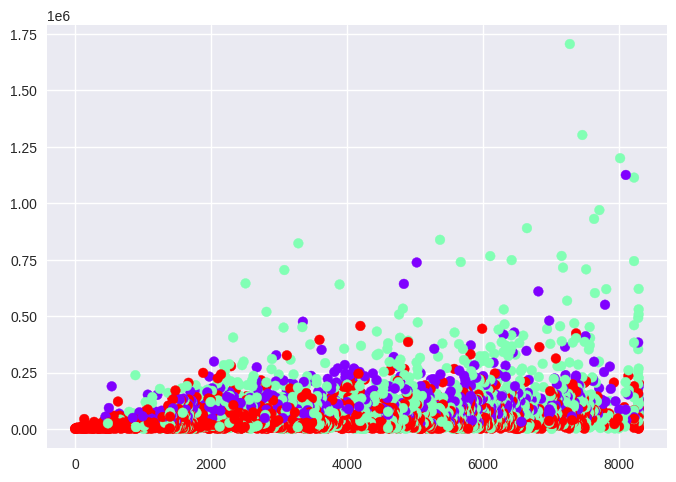

In [76]:
plt.scatter(air.Days_since_enroll,air.Balance,c=cluster,cmap=plt.cm.rainbow)

In [17]:
import seaborn as sns

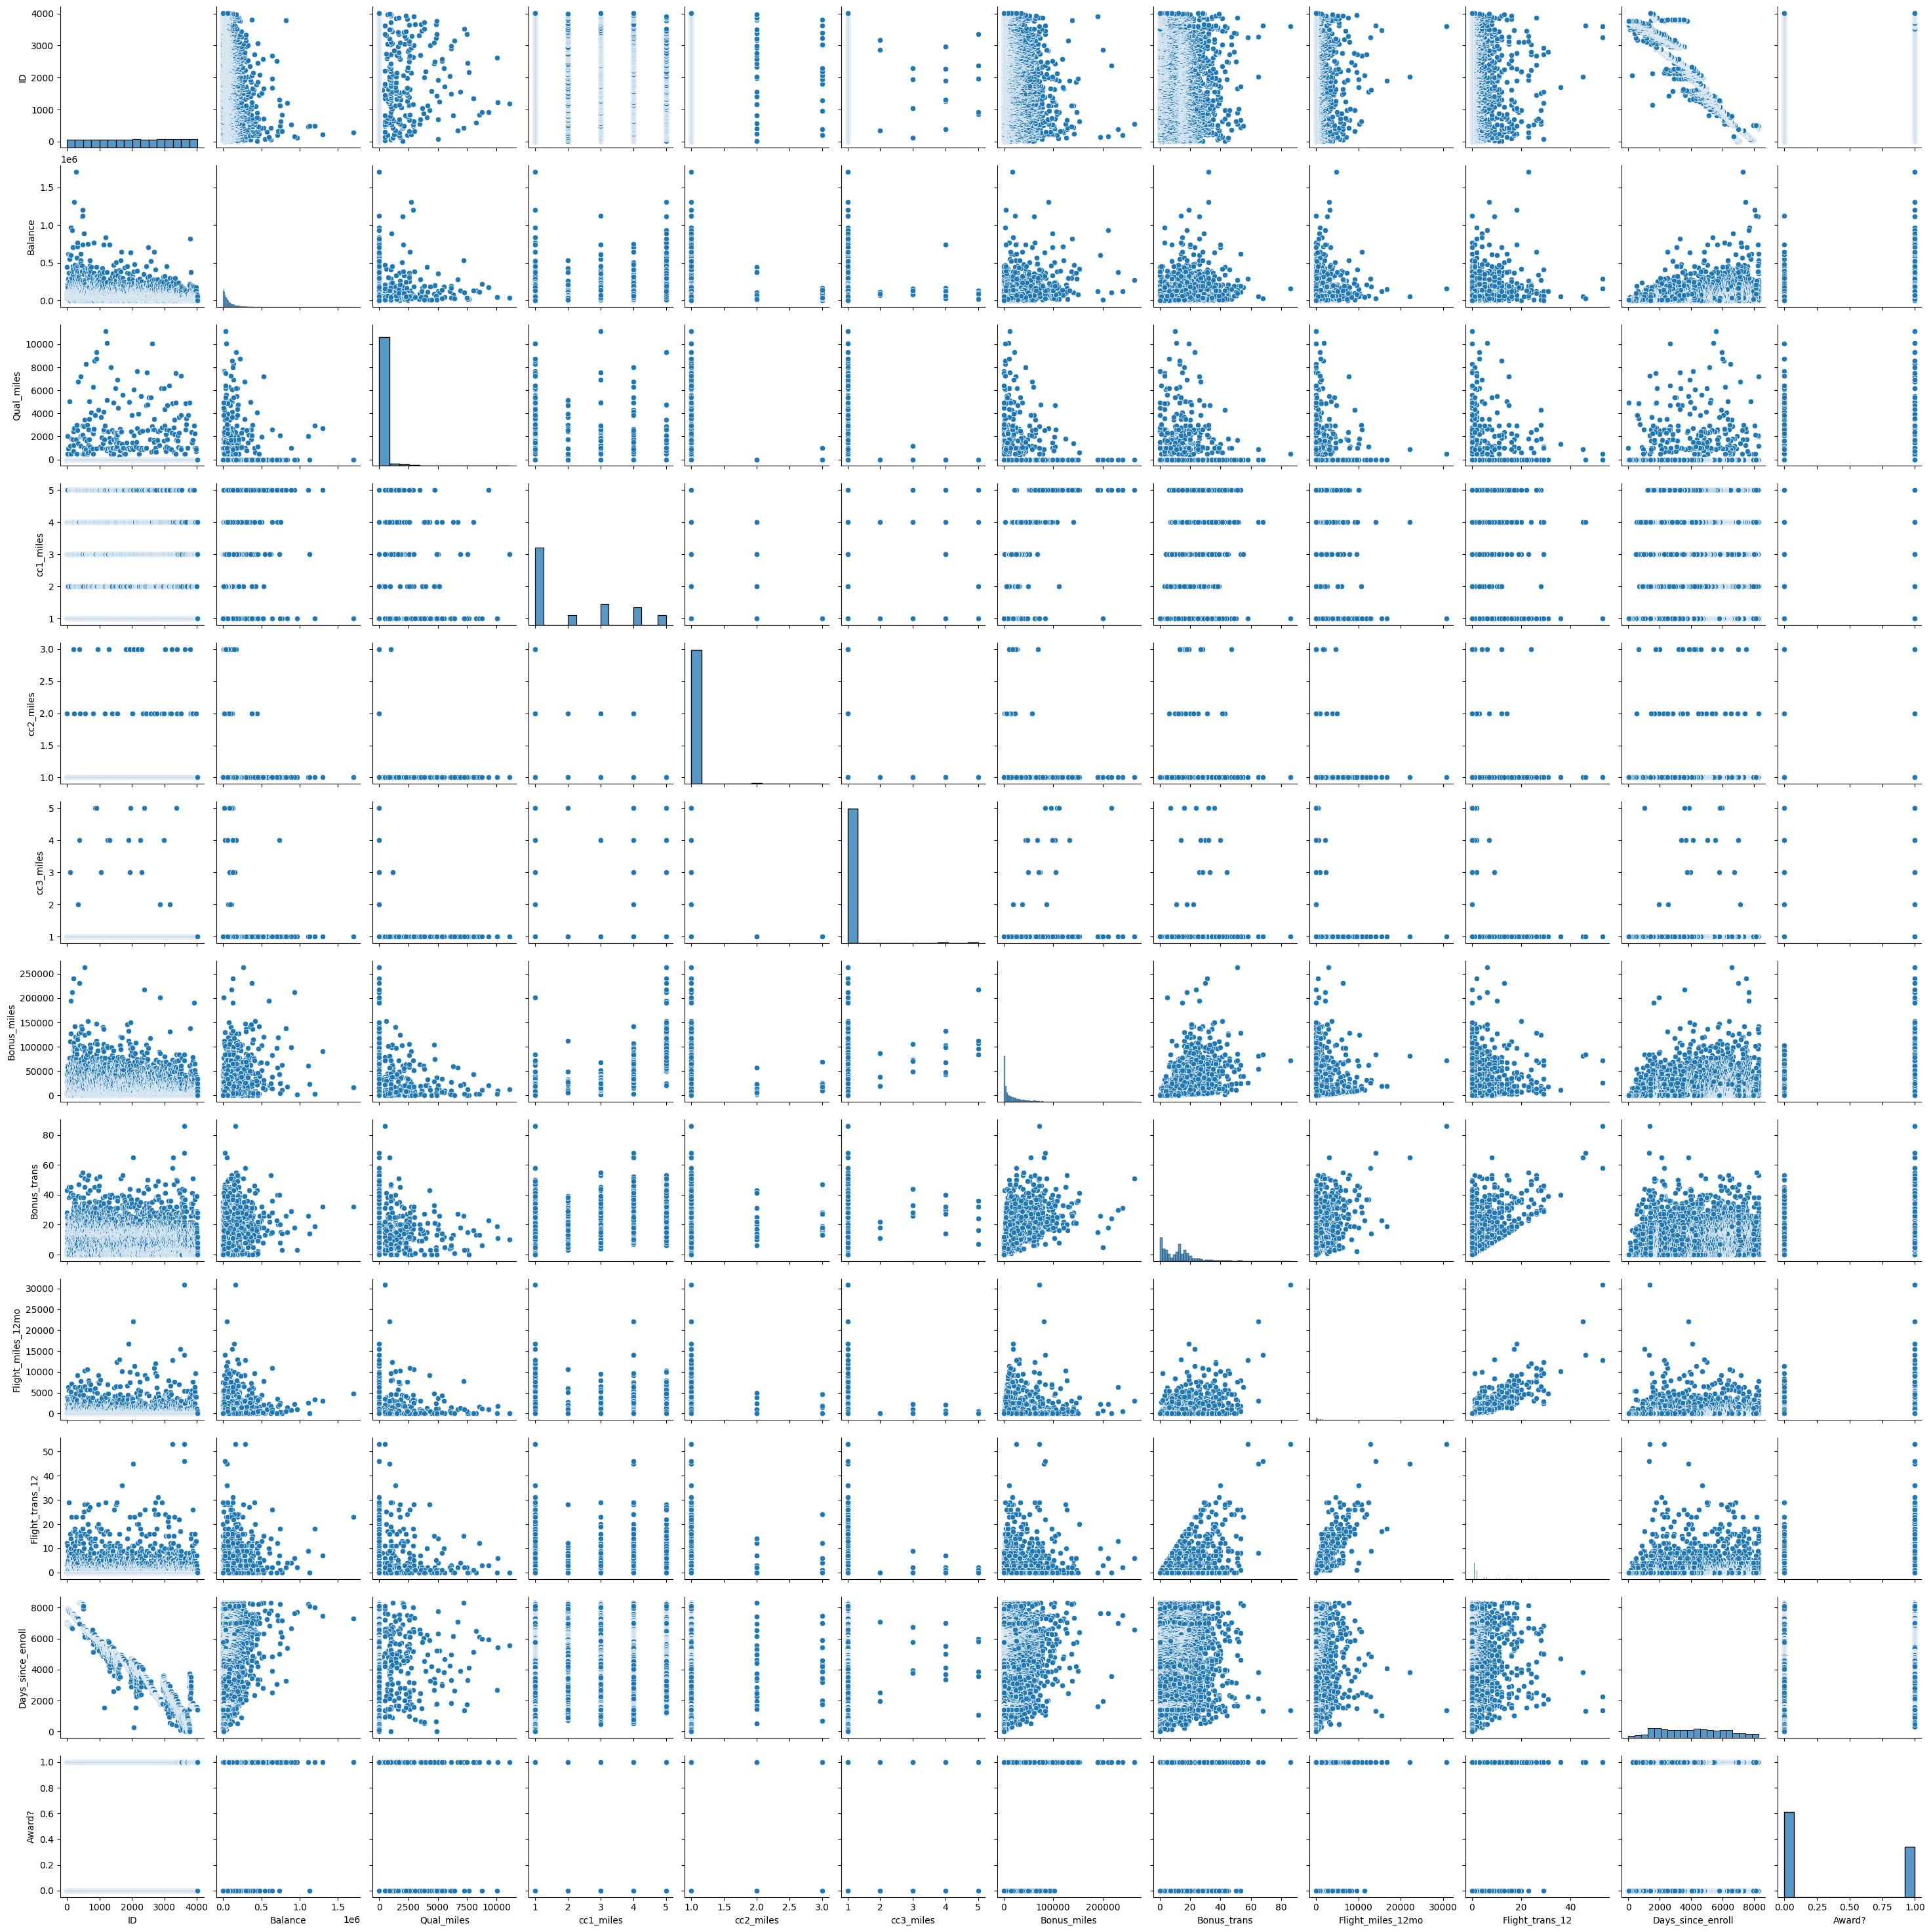

In [18]:
sns.pairplot(air)

In [19]:
l=[]
for i in range(2,12):
    model=KMeans(n_clusters=i)

    cluster_numbers=model.fit_predict(df)

    l.append(model.inertia_)

Text(0, 0.5, 'INERTIA')

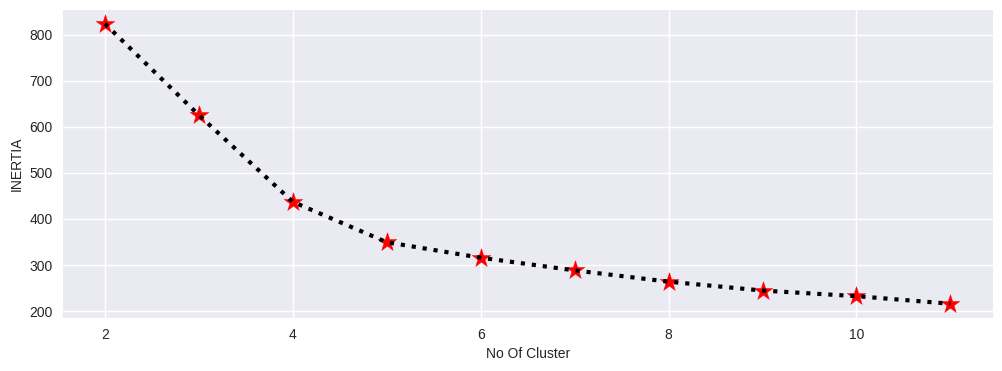

In [20]:
plt.figure(figsize=(12,4))
plt.style.use("seaborn")
plt.plot(range(2,12),l,linestyle=":",linewidth=3,color="black")
plt.scatter(range(2,12),l,s=200,marker="*",color="r")
plt.xlabel("No Of Cluster",size=10)
plt.ylabel("INERTIA",size=10)

In [21]:
nc = range(2,15)
l1 = []

for i in nc:
  model = KMeans(n_clusters=i)
  model.fit(df)
  cn=model.predict(df)
  l1.append(silhouette_score(df,cn))

Text(0, 0.5, 'Silhouette_Score')

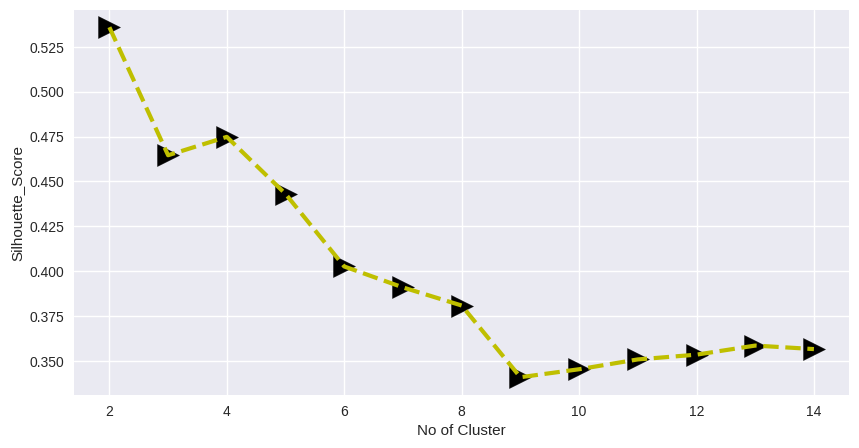

In [22]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn")
plt.plot(nc,l1,linestyle="--",linewidth=3,color="y")
plt.scatter(nc,l1,s=250,marker=">",color="black")
plt.xlabel("No of Cluster")
plt.ylabel("Silhouette_Score")

In [78]:
model_k = KMeans(n_clusters=2)
model_k.fit(df)

KMeans(n_clusters=2)

In [79]:
cluster_k = model_k.predict(df)

In [80]:
air_k = air

In [81]:
air_k["Clusters"]= cluster_k

In [82]:
air_k.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


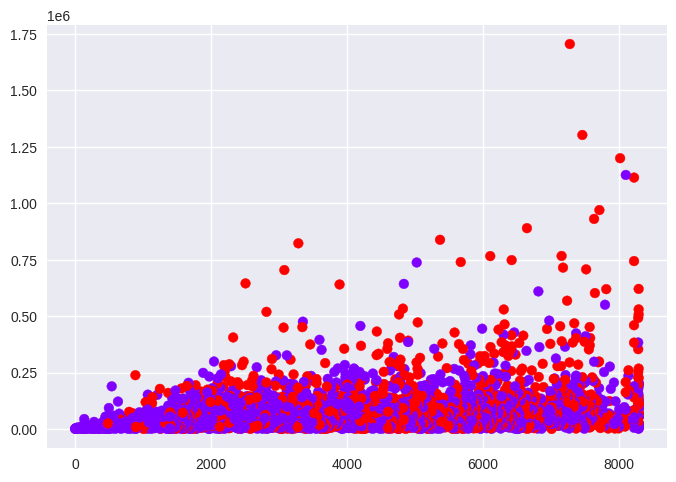

In [83]:
plt.scatter(air_k.Days_since_enroll,air_k.Balance,c=cluster_k,cmap=plt.cm.rainbow)

In [84]:
silhouette_K = silhouette_score(df,cluster_k)
silhouette_K

0.535930510919477

In [85]:
air_k.groupby("Clusters").mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
Clusters,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.016283
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.947333


In [86]:
air_k.groupby("Clusters")["Balance"].agg(["mean","max","min"])

,mean,max,min
Clusters,,,
0,59807.839555,1125076,50
1,97053.051317,1704838,0


HIERARCHICAL CLUSTER

In [32]:
df.sample()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3145,0.019422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296479,0.0


In [33]:
air.sample()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
2806,2828,83781,0,4,1,1,35151,22,200,1,2066,1,1


In [34]:
link = linkage(df,method="ward",metric="euclidean")

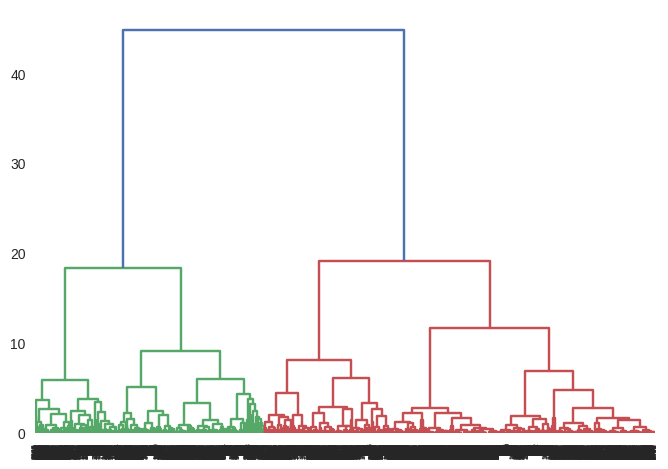

In [35]:
dendrogram(link)
plt.show()

In [36]:
model_h = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")

In [37]:
model_h.fit(df)

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [38]:
cluster_h=model_h.fit_predict(df)

In [39]:
air_h = air

In [40]:
air_h["Clusters"] = cluster_h

In [41]:
air_h.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [42]:
cluster_h

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
silhouette_h = silhouette_score(df,cluster_h)
silhouette_h

0.47040913679492186

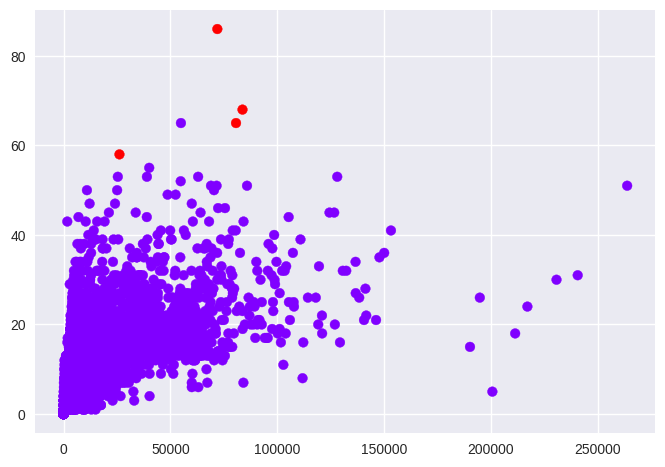

In [44]:
plt.scatter(air_h.Bonus_miles,air_h.Bonus_trans,c=cluster_h,cmap = plt.cm.rainbow)

In [45]:
air_h.groupby("Clusters").mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,2013.704881,73542.85632,143.911389,2.059074,1.014518,1.012265,17096.29612,11.54418,440.531414,1.325657,4120.4801,0.369712
1,3128.000000,131999.50000,347.000000,2.500000,1.000000,1.000000,65634.25000,69.25000,19960.000000,49.250000,2200.2500,1.000000


DBSCAN

In [46]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [47]:
from sklearn.neighbors import NearestNeighbors

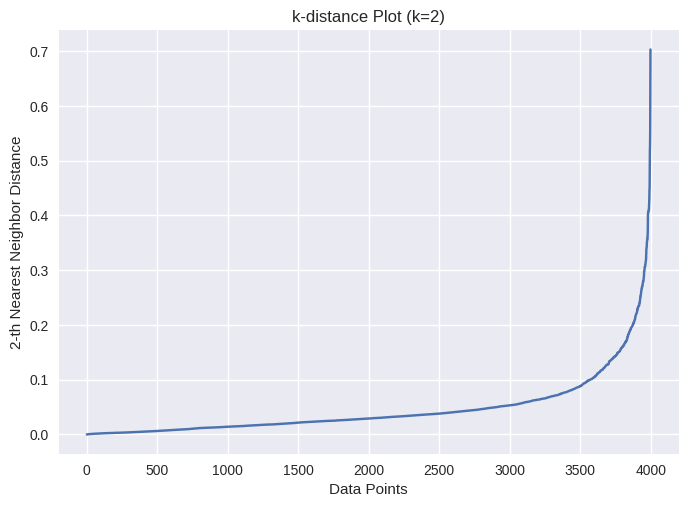

In [48]:
k = 2  # You can experiment with different values of k
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distances, _ = nbrs.kneighbors(df)

# Step 2: Sort the distances
distances = distances[:, -1]  # Take the distance to the k-th nearest neighbor

# Step 3: Plot the sorted distances
sorted_distances = sorted(distances)
plt.plot(range(len(sorted_distances)), sorted_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'k-distance Plot (k={k})')
plt.show()

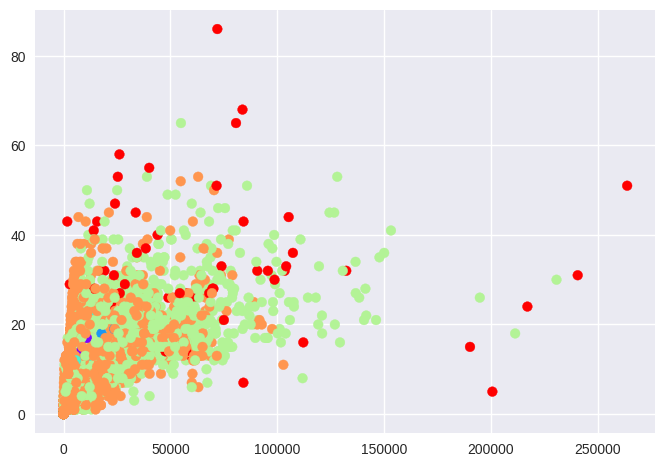

In [60]:
model_db=DBSCAN(min_samples=4,eps=0.3)

cluster_db=model_db.fit_predict(df)

plt.scatter(air.Bonus_miles,air.Bonus_trans,c=cluster_db,cmap=plt.cm.rainbow_r)

In [61]:
air_db = air

In [62]:
air_db["Cluster"]=cluster_db

In [63]:
air_db["Cluster"].unique()

array([ 0,  1, -1,  4,  3,  2])

In [64]:
air_db.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [54]:
silhouette_db = silhouette_score(df,cluster_db)
silhouette_db

0.23361850393033434

In [55]:
air_db.groupby("Cluster").mean(air_db)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
Cluster,,,,,,,,,,,,,
-1,1786.954545,240992.424242,1840.500000,2.984848,1.272727,1.696970,60556.106061,30.606061,3354.515152,10.212121,4655.681818,0.727273,0.060606
0,2170.543030,58924.159192,72.919192,1.702222,1.000000,1.000808,9929.035556,8.994343,222.698990,0.632727,3824.424646,0.000000,0.000000
1,1746.606868,91961.049755,192.267694,2.659425,1.000000,1.000701,27788.385424,15.199720,743.997898,2.265592,4614.430974,1.000000,0.000000
2,2388.250000,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000,0.000000
3,2417.666667,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000,0.000000
4,2475.166667,45522.833333,0.000000,1.000000,2.000000,1.000000,8344.166667,13.333333,291.666667,0.833333,3998.333333,1.000000,0.000000


Final result

In [87]:
cluster_methods = {"Clustering techniques":["K-Mean","Hierarchical","DBSCAN"],"Silhouette Score":[silhouette_K,silhouette_h,silhouette_db],
                   "Total Cluster":[4,2,6]}

In [88]:
pd.DataFrame(cluster_methods)

,Clustering techniques,Silhouette Score,Total Cluster
0,K-Mean,0.535931,4
1,Hierarchical,0.470409,2
2,DBSCAN,0.233619,6
